<a href="https://colab.research.google.com/github/RyugaSunny/collab/blob/main/mltesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [63]:
df = pd.read_csv('magic04.data')
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df.columns = cols
df['class'] = df['class'].map({'g':1,'h':0})

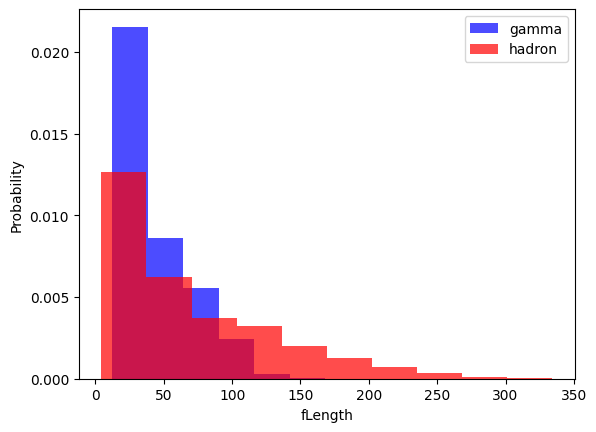

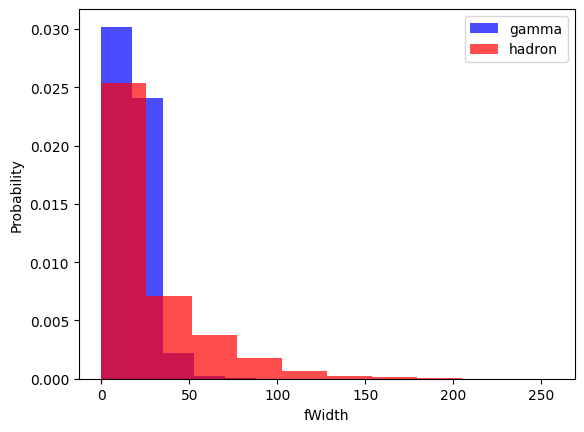

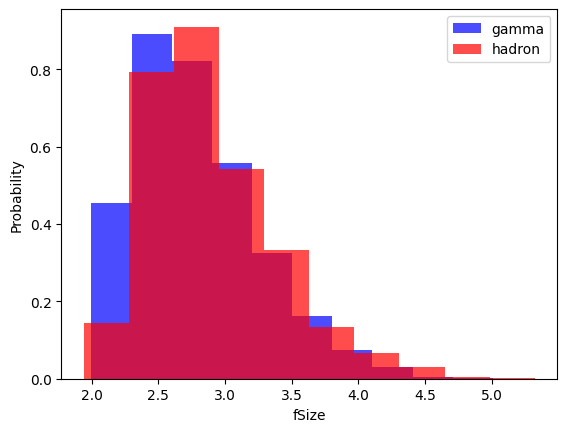

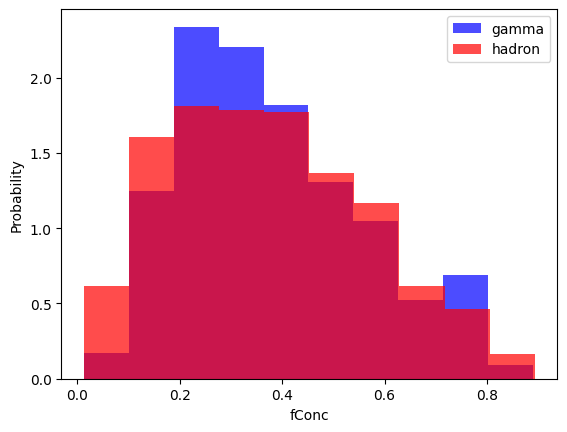

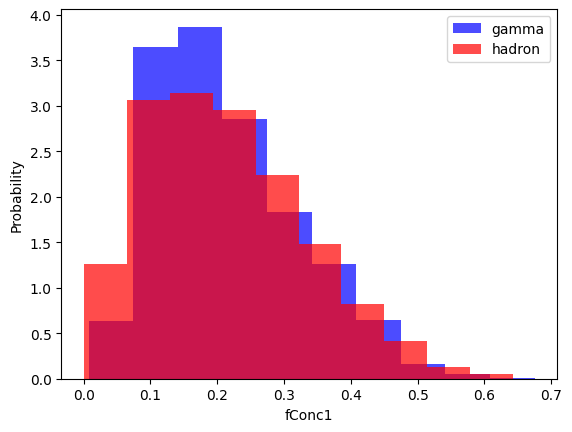

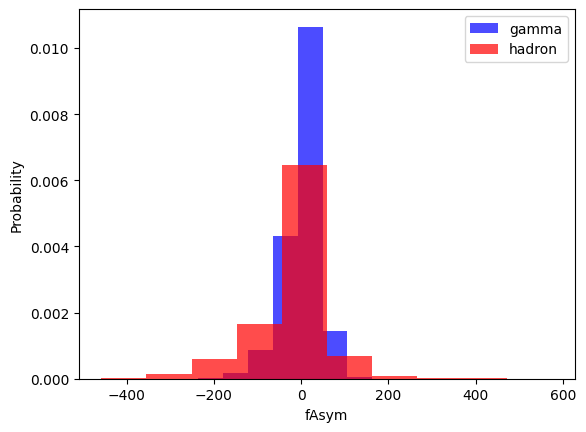

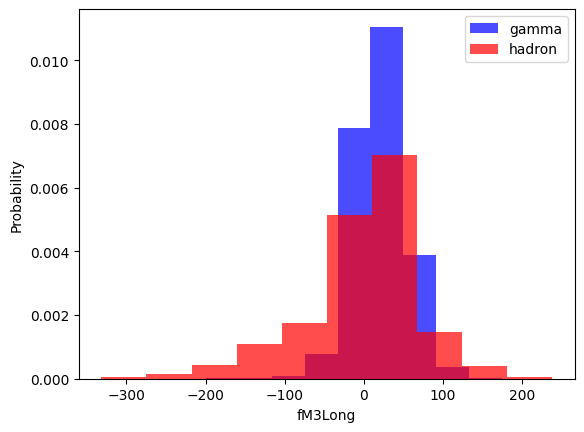

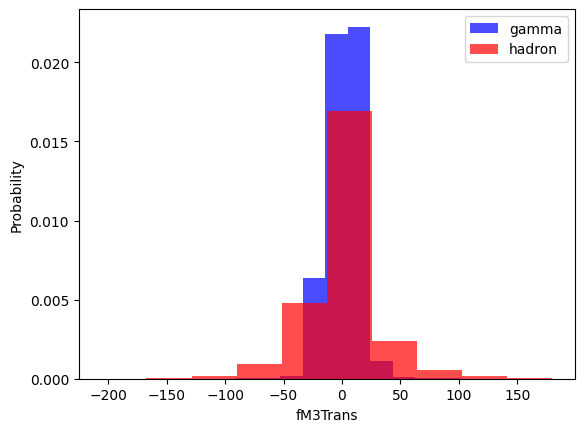

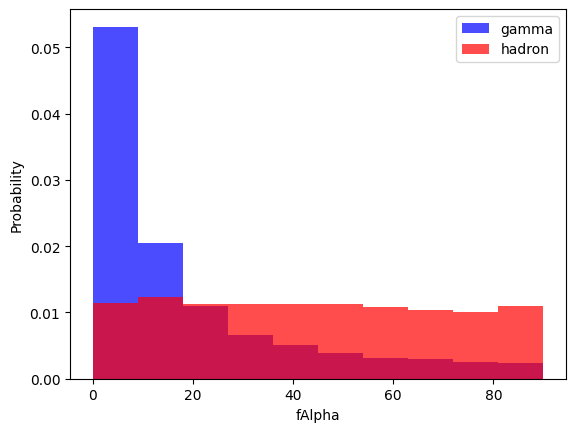

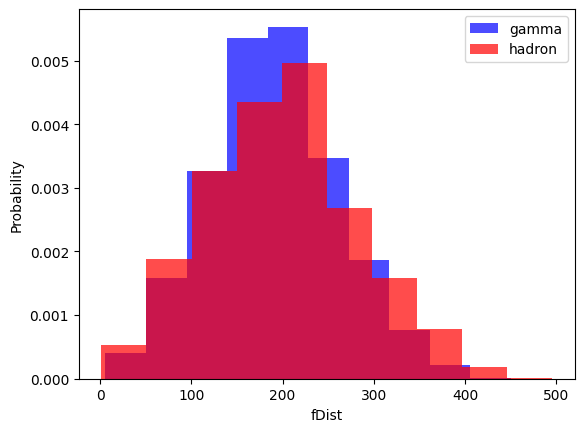

In [64]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

In [65]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [66]:
def scale_dataset(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)

    data = np.hstack((X,np.reshape(y,(-1,1))))
    dataframe = pd.DataFrame(data,columns=dataframe.columns)
    return data, X, y

In [67]:
train, X_train, y_train = scale_dataset(train,oversample=True)
valid, X_valid, y_valid = scale_dataset(valid,oversample=False)
test, X_test, y_test = scale_dataset(test,oversample=False)